In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#open('/content/gdrive/My Drive/sentiment.csv')
# df = pd.read_csv(open('/content/gdrive/My Drive/sentiment.csv'))
df = pd.read_csv('sentiment.csv')
df.head()

,Phrase,label
0,Spider-man is better than any summer blockbust...,Positive
1,of good sense,Positive
2,", then knock yourself out and enjoy the big sc...",Negative
3,So could young romantics out on a date .,Positive
4,humour,Positive


In [40]:
len(df)
#X = df['Phrase'].values
#y = df['label'].values

2800

In [41]:
total = len(df)
train = int(0.6 * total)
val = int(0.2*total)

train_df = df[:train]
#y_train = y[:train].reshape(-1,1)

val_df = df[train:train + val]
#y_val = y[train:train +val].reshape(-1,1)

test_df = df[train + val:]
#y_test = y[train + val:].reshape(-1,1)

print(len(train_df), len(val_df),len(test_df))

1680 560 560


In [42]:
train_df.head()

,Phrase,label
0,Spider-man is better than any summer blockbust...,Positive
1,of good sense,Positive
2,", then knock yourself out and enjoy the big sc...",Negative
3,So could young romantics out on a date .,Positive
4,humour,Positive


In [43]:
vocab = list()
for i in train_df.Phrase.tolist():
    vocab.extend(i.split(' '))
u_vocab = list(set(vocab))
print(len(vocab),len(u_vocab))

13855 1844


In [44]:
%time
nplist=np.array(vocab)
nplist


CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 11.7 µs


array(['Spider-man', 'is', 'better', ..., 'their', 'own', '.'],
      dtype='<U18')

## Feature Extraction

In [45]:
def extract_feature(f_df):
    feature = []
    label = []
    for index, row in train_df.iterrows():
        words = row['Phrase'].split(" ")
        f = []
        for v in u_vocab:
            if v in words:
                f.append(1)
            else:
                f.append(0)
        if row['label'] == "Positive":
            label.append(1)
        elif row['label'] == "Negative":
            label.append(0)

        feature.append(f)
    feature = np.array(feature)
    label = np.array(label)
    label = label.reshape(-1,1)
    return feature, label

In [46]:
X_train, y_train = extract_feature(train_df)
X_val, y_val = extract_feature(val_df)
X_test, y_test = extract_feature(test_df)

In [47]:
X_test.shape

(1680, 1844)

In [48]:
y_train.shape

(1680, 1)

In [49]:
X_train = np.insert(X_train, 0, values = 1 , axis = 1)
X_val = np.insert(X_val, 0, values = 1 , axis = 1)
X_test = np.insert(X_test, 0, values = 1 , axis = 1)

In [50]:
print(X_train.shape)
print(y_train.shape)

(1680, 1845)
(1680, 1)


In [51]:
X_train

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0]])

## Sigmoid Function

In [52]:
def Sigmoid(x):
    return 1/(1+np.exp(-x))

In [53]:
np.random.seed(42)

train_error=[]

param={
    'num_of_iteration':1000,
    'learning_rate':0.1,
    'regularization':0.1
}

grid_param={
    'num_of_iteration':[5000],
    'learning_rate':[0.1,0.9,5],
    'regularization':[0.001]
}

def Cost(h,y):
    return (-y*np.log(h)-(1-y)*np.log(1-h)).mean()

In [54]:
import itertools
grid=list(itertools.product(grid_param['num_of_iteration'],grid_param['learning_rate'],grid_param['regularization']))
print(grid)

[(5000, 0.1, 0.001), (5000, 0.9, 0.001), (5000, 5, 0.001)]


In [55]:
def train_model(X_train, y_train, X_val, y_val, param):
    np.random.seed(42)
    W=np.random.rand(X_train.shape[1]).reshape(-1,1)    #We reshape the row vector(1*4) to column vector(4*1)
    
    train_error=[]
    val_error=[]
    

    #Run the loop num_of_iteration times 
    for i in range(1,param['num_of_iteration']):
        z=np.matmul(X_train,W)        #z is matrix mul of X_train and W
        h_train=Sigmoid(z)
        R=param['regularization']*sum(W**2)
        train_loss=Cost(h_train,y_train)+R   #loss in training data is calculated by calling MSE function
#         print(train_loss)
        train_error.append(train_loss)      
        
        #Gradient-- Code form of the formula. shape[0] gives the number of rows
#         gradient_main=(np.matmul(np.transpose(h_train-y_train),X_train)/X_train.shape[0])   
        gradient_main=np.matmul(X_train.T,(h_train-y_train))/X_train.shape[0]     
        
        #Regularized Gradient
        gradient_reg=2*param['regularization']*W
#         print(gradient_main.shape)
        gradient_reg[0]=0
        gradient=gradient_main+gradient_reg
        
        #W is the updated weight
#         W=W-param['learning_rate']*gradient
        W=W-param['learning_rate']*gradient
    
    #Once training is done. We have to use Val set to tune hyper parameter. 
    #The p(combination) that gives least error is our final value for hyperparameters.
    z_val=np.matmul(X_val,W)
    val_loss=Cost(Sigmoid(z_val),y_val)
    val_error.append(val_loss)
    return W, train_error, val_error

In [56]:
# Weights,train_error,val_error=train_model(X_train,y_train,X_val,y_val,param)
# # print(train_error)
# plt.plot(np.arange(len(train_error)),train_error)
# plt.xlabel("No. of iterations")
# plt.ylabel("Training Error")   
# plt.show()

{'num_of_iteration': 5000, 'learning_rate': 0.1, 'regularization': 0.001}
[0.3619127036328045]


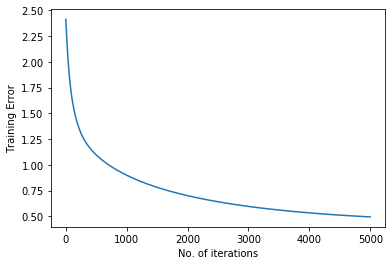

{'num_of_iteration': 5000, 'learning_rate': 0.9, 'regularization': 0.001}
[0.3365609658637123]


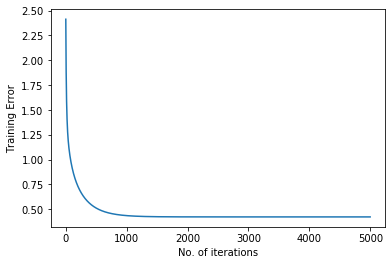

{'num_of_iteration': 5000, 'learning_rate': 5, 'regularization': 0.001}


In [ ]:
for g in grid:
    p={
    'num_of_iteration':g[0],
    'learning_rate':g[1],
    'regularization':g[2]
    }
    print(p)
    Weights,train_error,val_error=train_model(X_train,y_train,X_val,y_val,p)
    print(val_error)
    plt.plot(np.arange(len(train_error)),train_error)
    plt.xlabel("No. of iterations")
    plt.ylabel("Training Error")   
    plt.show()

In [ ]:
final_param = {'num_of_iteration': 5000, 'learning_rate': 5.0, 'regularization': 0.000}
final_param1 = {'num_of_iteration': 5000, 'learning_rate': 0.9, 'regularization': 0.001}
model_weights =  train_model(X_train,y_train,X_val,y_val,final_param) #Returns Weight, train_error and validation error


In [ ]:
#Select weight only as
model_weights=model_weights[0]
model_weights

In [ ]:
model_weights.shape

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
y_test.reshape(1,-1)

### Concept:
#### X_test * model_weights  ----> Prediction  ~ y_test
### (1680,1845) * (1845,1) ---> (1680,1) ~ (1680,1)

In [ ]:
prediction=np.dot(X_test,model_weights)

In [ ]:
predict=list(map(lambda x: 0 if x<=0.5 else 1, prediction))

In [ ]:
print('+ve in prediction  : ',predict.count(1)) # Positive Predictions
# print('+ve in test dataset: ',y_test.count(1))
print('-ve in prediction  : ',predict.count(0)) # Negative Predictions
# print('-ve in test dataset: ',y_test.count(0))

In [ ]:
print(predict[9])
y_test[9]

In [ ]:
tp=fp=fn=tn=0

for i in range(len(predict)):
    if (predict[i]==1 and y_test[i]==1):
        tp+=1
    elif (predict[i]==1 and y_test[i]==0):
        fp+=1
    elif (predict[i]==0 and y_test[i]==1):
        fn+=1
    else:
        tn+=1

print('True Positive: {}\nFalse Positive: {}\nFalse Negative: {}\nTrue Negative: {}'.format(tp,fp,fn,tn))

In [ ]:
print('\t\tConfusion Matrix\n')
print('\t\tActual Value')
print(' \tPositive\tNegative')
print('+ \t{}\t\t{}'.format(tp,fp))
print('- \t{}\t\t{}'.format(fn,tn))

In [ ]:
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1=(2*precision*recall)/(precision+recall)
accuracy=(tp+tn)/(len(y_test))
specificity=tn/(tn+fp)


In [ ]:
print('Precision\t: {}\nRecall\t\t: {}\nF1\t\t: {}\nAccuracy\t: {}'.format(precision,recall,f1,accuracy))

In [ ]:
# final_param = {'num_of_iteration': 5000, 'learning_rate': 0.9, 'regularization': 0.001}

# Precision	: 0.9516864175022789
# Recall		: 0.9613259668508287
# F1		: 0.9564819056344479
# Accuracy	: 0.9434523809523809

# final_param = {'num_of_iteration': 5000, 'learning_rate': 0.1, 'regularization': 0.001}
# Precision	: 0.9341864716636198
# Recall		: 0.9410681399631676
# F1		: 0.9376146788990826
# Accuracy	: 0.919047619047619

In [ ]:
# from pandas_ml import ConfusionMatrix
# confusion_matrix = plt.ConfusionMatrix(predict, y_test)
# print("Confusion matrix:\n%s" % confusion_matrix)